## 공공데이터 실습: 국가별 수산물 수출입 현황 (2021년)

### 실습 데이터셋 설명

- 2021년 1~12월에 전세계 165여 개 국가와 수산물 수출입 내역입니다.<br><br>

- 변수(열)에 대한 간단한 설명입니다.
  - ymonth: 거래년월
  - nation: 거래국가
  - itemNm: 거래품목(수산물)
  - imxprt: 수출/수입 구분
  - weight: 거래중량(kg)
  - dollar: 거래금액(달러)<br><br>

- 실습 데이터셋을 미리보기 합니다.
<img src="https://raw.githubusercontent.com/HelloDataScience/Images/main/Seafood%20Preview%202021.png" align="left" width="400">

### 실습 데이터셋 인코딩 확인

In [1]:
# 관련 라이브러리를 호출합니다.
import os
import chardet
import requests
import numpy as np
import pandas as pd

In [2]:
# 온라인으로 공유 중인 csv 파일 주소를 URL에 할당합니다.
URL = 'https://bit.ly/Seafood_Trade_2021yr'

In [3]:
# URL에 있는 텍스트를 내려받습니다.(HTTP Requests)
res = requests.get(url = URL)

In [4]:
# res에서 바이너리 텍스트의 일부를 출력합니다.
res.content[:200]

b'"ymonth","nation","itemNm","imxprt","weight","dollar"\n"202101","\xea\xb0\x80\xeb\x82\x98","\xea\xb3\xa0\xeb\x93\xb1\xec\x96\xb4","\xec\x88\x98\xec\xb6\x9c",107300,121443\n"202101","\xea\xb0\x80\xeb\x82\x98","\xea\xb8\xb0\xed\x83\x80","\xec\x88\x98\xec\x9e\x85",10,2808\n"202101","\xea\xb0\x80\xeb\x82\x98","\xeb\x8b\xa4\xeb\x9e\x91\xec\x96\xb4","\xec\x88\x98\xec\x9e\x85",47446.8,24'

In [5]:
# 바이너리 텍스트의 인코딩 방식을 확인합니다.
chardet.detect(res.content[:200])

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

### 실습 데이터셋 전처리

In [6]:
# csv 파일을 읽고 데이터프레임 df를 생성합니다.
df = pd.read_csv(URL)

In [7]:
# df의 정보를 확인합니다.
# info() 함수를 사용하세요.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31865 entries, 0 to 31864
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ymonth  31865 non-null  int64  
 1   nation  31865 non-null  object 
 2   itemNm  31865 non-null  object 
 3   imxprt  31865 non-null  object 
 4   weight  31865 non-null  float64
 5   dollar  31865 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 1.5+ MB


In [8]:
# df의 처음 5행을 출력합니다.
# head() 함수를 사용하세요.
df.head()

,ymonth,nation,itemNm,imxprt,weight,dollar
0,202101,가나,고등어,수출,107300.000,121443
1,202101,가나,기타,수입,10.000,2808
2,202101,가나,다랑어,수입,47446.800,241880
3,202101,가나,전갱이,수출,108000.000,106400
4,202101,가봉,어류,수입,1.615,26


In [9]:
# df의 마지막 5행을 출력합니다.
# tail() 함수를 사용하세요.
df.tail()

,ymonth,nation,itemNm,imxprt,weight,dollar
31860,202112,홍콩,포유동물,수출,4.0,600
31861,202112,홍콩,해삼,수출,20.0,17000
31862,202112,홍콩,해삼,수출,180.0,1180
31863,202112,홍콩,해초류와조류,수출,16.0,153
31864,202112,홍콩,해파리,수출,81.6,515


In [10]:
# ymonth의 자료형을 문자열로 변환하고 ymonth에 재할당합니다. 
# astype() 함수를 사용하세요.
df['ymonth'] = df['ymonth'].astype('str')

In [11]:
# dollar를 1000으로 나눈 결과를 dollar에 재할당합니다.
df['dollar'] = df['dollar'] / 1000

In [12]:
# dollar의 기술통계량을 확인합니다.
# describe() 함수를 사용하세요.
df['dollar'].describe()

count    31865.000000
mean       282.516008
std       1388.473510
min          0.000000
25%          0.838000
50%          8.251000
75%         78.132000
max      40737.080000
Name: dollar, dtype: float64

In [13]:
# nation의 빈도수를 확인합니다.
# value_counts() 함수를 사용하세요.
df['nation'].value_counts()

미국        3351
중국        2905
일본        2614
베트남       1948
카나다       1371
          ... 
그루지야         1
우간다          1
세인트루시아       1
룩셈부르그        1
통가           1
Name: nation, Length: 165, dtype: int64

### 국가별 수출입금액을 합산하고 무역수지 흑자 상위 국가 확인

In [14]:
# 아래 조건을 만족하는 피벗 테이블을 trade에 할당합니다.
# pd.pivot_table() 함수를 사용하세요.
# 데이터(data)는 df, 값(values)은 dollar, 
# 행이름(index)은 nation, 열이름(columns)은 imxprt, 
# 집계함수는 np.sum을 지정하세요.
trade = pd.pivot_table(
    data = df, 
    values = 'dollar', 
    index = 'nation', 
    columns = 'imxprt', 
    aggfunc = np.sum
)

In [15]:
# trade의 처음 10행을 출력합니다.
trade.head(n = 10)

imxprt,수입,수출
nation,,
가나,1847.987,8088.674
가봉,0.026,NaN
가이아나,17.290,0.036
감비아,2065.081,NaN
과테말라,NaN,131.373
괌,0.248,1158.087
그루지야,NaN,0.378
그리스,368.843,175.438
그린랜드,468.529,NaN


In [16]:
# trade에 있는 결측값을 0으로 대체하고 trade에 재할당합니다.
trade = trade.fillna(value = 0)

In [17]:
# trade의 수출에서 수입을 뺀 무역수지를 생성합니다.
trade['무역수지'] = trade['수출'] - trade['수입']

In [18]:
# trade의 처음 10행을 출력합니다.
trade.head(n = 10)

imxprt,수입,수출,무역수지
nation,,,
가나,1847.987,8088.674,6240.687
가봉,0.026,0.000,-0.026
가이아나,17.290,0.036,-17.254
감비아,2065.081,0.000,-2065.081
과테말라,0.000,131.373,131.373
괌,0.248,1158.087,1157.839
그루지야,0.000,0.378,0.378
그리스,368.843,175.438,-193.405
그린랜드,468.529,0.000,-468.529


In [19]:
# trade를 무역수지로 내림차순 정렬하고 trade에 재할당합니다.
trade = trade.sort_values(by = ['무역수지'], ascending = False)

In [20]:
# trade의 처음 5행을 출력합니다.(무역수지 흑자국가)
trade.head()

imxprt,수입,수출,무역수지
nation,,,
일본,170243.592,635499.670,465256.078
미국,250113.606,395386.470,145272.864
프랑스,34315.325,66501.818,32186.493
이탈리아,25683.273,52961.214,27277.941
독일,1263.392,27186.712,25923.320


In [21]:
# trade의 마지막 5행을 출력합니다.(무역수지 적자국가)
trade.tail()

imxprt,수입,수출,무역수지
nation,,,
페루,165384.173,2710.209,-162673.964
중국,1300449.248,726529.129,-573920.119
노르웨이,575973.581,1884.646,-574088.935
베트남,808388.014,177741.726,-630646.288
러시아,1219825.619,54078.994,-1165746.625


### 무역수지 흑자 1위 국가의 수출입 수산물 목록 확인

In [22]:
# df에서 nation이 '일본'인 행을 데이터프레임 japan에 할당합니다.
# eq() 함수를 사용하세요.
japan = df[df['nation'].eq('일본')]

In [23]:
# japan의 정보를 확인합니다.
japan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2614 entries, 1458 to 30891
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ymonth  2614 non-null   object 
 1   nation  2614 non-null   object 
 2   itemNm  2614 non-null   object 
 3   imxprt  2614 non-null   object 
 4   weight  2614 non-null   float64
 5   dollar  2614 non-null   float64
dtypes: float64(2), object(4)
memory usage: 143.0+ KB


In [24]:
# 아래 조건을 만족하는 피벗 테이블을 japan에 재할당합니다.
# pd.pivot_table() 함수를 사용하세요.
# 데이터(data)는 japan, 값(values)은 dollar, 
# 행이름(index)은 itemNm, 열이름(columns)은 imxprt, 
# 집계함수는 np.sum을 지정하세요.
japan = pd.pivot_table(
    data = japan, 
    values = 'dollar', 
    index = 'itemNm', 
    columns = 'imxprt', 
    aggfunc = np.sum
)

In [25]:
# japan의 처음 10행을 출력합니다.
japan.head(n = 10)

imxprt,수입,수출
itemNm,,
가공하지 않은 것,0.350,0.041
가공한 것,6.018,1.059
가다랑어,4.409,2580.066
가리비과,39305.985,13.476
가오리,4622.530,NaN
가자미,NaN,0.009
간,7.931,25.204
간유,0.019,27.766
갈치,3618.230,253.127


In [26]:
# japan에 있는 결측값을 0으로 대체하고 japan에 재할당합니다.
japan = japan.fillna(value = 0)

In [27]:
# japan의 수출에서 수입을 뺀 무역수지를 생성합니다.
japan['무역수지'] = japan['수출'] - japan['수입']

In [28]:
# japan의 처음 10행을 출력합니다.
japan.head(n = 10)

imxprt,수입,수출,무역수지
itemNm,,,
가공하지 않은 것,0.350,0.041,-0.309
가공한 것,6.018,1.059,-4.959
가다랑어,4.409,2580.066,2575.657
가리비과,39305.985,13.476,-39292.509
가오리,4622.530,0.000,-4622.530
가자미,0.000,0.009,0.009
간,7.931,25.204,17.273
간유,0.019,27.766,27.747
갈치,3618.230,253.127,-3365.103


In [29]:
# japan을 무역수지로 내림차순 정렬하고 japan에 재할당합니다.
japan = japan.sort_values(by = ['무역수지'], ascending = False)

In [30]:
# japan의 처음 5행을 출력합니다.
japan.head()

imxprt,수입,수출,무역수지
itemNm,,,
다랑어,1275.676,128950.909,127675.233
김,436.750,114139.670,113702.920
전복,36.525,42698.612,42662.087
붕장어,0.000,31125.801,31125.801
냉동한 것,501.435,22728.785,22227.350


In [31]:
# japan의 마지막 5행을 출력합니다.
japan.tail()

imxprt,수입,수출,무역수지
itemNm,,,
명태,6158.574,100.207,-6058.367
우렁쉥이,7345.288,0.000,-7345.288
방어,36058.005,3505.671,-32552.334
돔,36402.686,21.139,-36381.547
가리비과,39305.985,13.476,-39292.509


### [보너스]

In [32]:
# 국가명을 지정하면 수출입 수산물 목록을 반환하는 함수를 생성합니다.
def seafoodItemList(nation):
    items = df[df['nation'].eq(nation)]
    items = pd.pivot_table(
        data = items, 
        values = 'dollar', 
        index = 'itemNm', 
        columns = 'imxprt', 
        aggfunc = np.sum
    )
    items = items.fillna(value = 0)
    items['무역수지'] = items['수출'] - items['수입']
    items = items.sort_values(by = ['무역수지'], ascending = False)
    return items

In [33]:
# 함수를 테스트합니다.
seafoodItemList(nation = '러시아')

imxprt,수입,수출,무역수지
itemNm,,,
김,207.204,46977.713,46770.509
생선묵,0.000,1072.798,1072.798
미역,0.000,736.232,736.232
스리루리나 효모,0.000,600.826,600.826
가다랑어,0.000,349.124,349.124
...,...,...,...
명란,78145.387,0.000,-78145.387
대구,93837.745,0.000,-93837.745
게,182583.026,0.000,-182583.026


### 막대그래프 그리기

In [34]:
# 관련 라이브러리를 호출합니다.
# GraphicSetting.py 모듈을 호출해보세요.
from GraphicSetting import *

In [35]:
# japan의 처음 10행을 Top10에 할당합니다.
# head() 함수를 사용하세요.
Top10 = japan.head(n = 10)

In [36]:
# Top10을 출력합니다.
Top10

imxprt,수입,수출,무역수지
itemNm,,,
다랑어,1275.676,128950.909,127675.233
김,436.750,114139.670,113702.920
전복,36.525,42698.612,42662.087
붕장어,0.000,31125.801,31125.801
냉동한 것,501.435,22728.785,22227.350
붉은 대게살,62.880,21318.554,21255.674
황새치,402.789,19485.220,19082.431
바지락,0.000,17493.784,17493.784
전갱이,2.444,17431.010,17428.566


In [37]:
# Top10의 행이름을 초기화하고 Top10에 재할당합니다.
# reset_index() 함수를 사용하세요.
# 기존 행이름을 열로 추가해야 하므로 drop = True를 추가하면 안됩니다.
Top10 = Top10.reset_index()

In [38]:
# Top10을 출력합니다.
Top10

imxprt,itemNm,수입,수출,무역수지
0,다랑어,1275.676,128950.909,127675.233
1,김,436.750,114139.670,113702.920
2,전복,36.525,42698.612,42662.087
3,붕장어,0.000,31125.801,31125.801
4,냉동한 것,501.435,22728.785,22227.350
5,붉은 대게살,62.880,21318.554,21255.674
6,황새치,402.789,19485.220,19082.431
7,바지락,0.000,17493.784,17493.784
8,전갱이,2.444,17431.010,17428.566
9,넙치,0.000,17113.017,17113.017


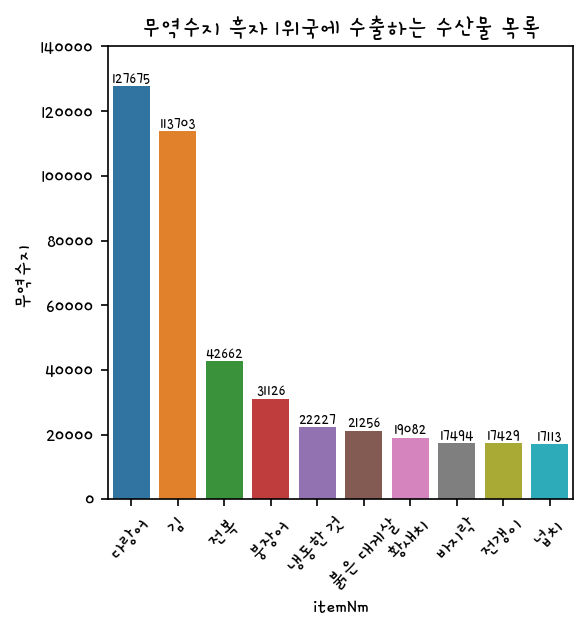

In [39]:
# Top10의 itemNm을 x축, 무역수지를 y축에 놓고 막대그래프를 그립니다.
# sns.barplot() 함수를 사용하세요.
sns.barplot(data = Top10, x = 'itemNm', y = '무역수지')

plt.title(label = '무역수지 흑자 1위국에 수출하는 수산물 목록')
plt.ylim(0, 140000)
plt.xticks(rotation = 45)

for i, v in enumerate(Top10['무역수지']):
    plt.text(x = i, y = v, s = int(round(v, 0)), 
             ha = 'center', va = 'bottom', 
             fontsize = 8);

## End of Document